In [1]:
!git clone https://github.com/Himank-J/ERAV2_Master.git

Cloning into 'ERAV2_Master'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 39 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (39/39), 16.08 KiB | 5.36 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
%cd ERAV2_Master

import sys
sys.path.append(".")

/content/ERAV2_Master


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from models.model_S11 import ResNet18
from utility.utils_S11 import LoadDataset, VisualizeData, LearningRateFinder, TrainTest

In [6]:
dataloader = LoadDataset()
dataviz = VisualizeData()
lrf = LearningRateFinder()
traintest = TrainTest()

CUDA Available? True
MPS Available? False


In [7]:
train_loader,test_loader = dataloader.getData(512)

100%|██████████| 170498071/170498071 [00:03<00:00, 48401414.92it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train and Test data loaded


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


images.shape: torch.Size([512, 3, 32, 32])
labels.shape: torch.Size([512])


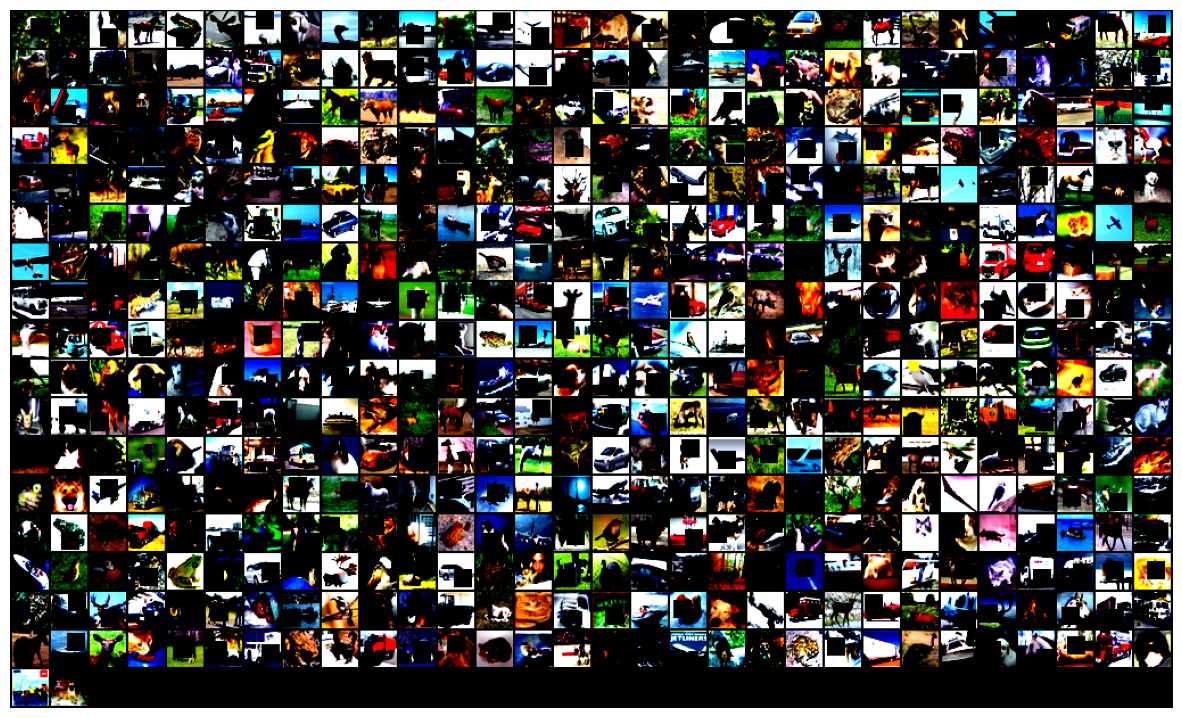

In [8]:
dataviz.visualize(train_loader)

In [9]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [10]:
lrf.findLR(model,train_loader)

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()


LR suggestion: steepest gradient
Suggested LR: 1.83E-01


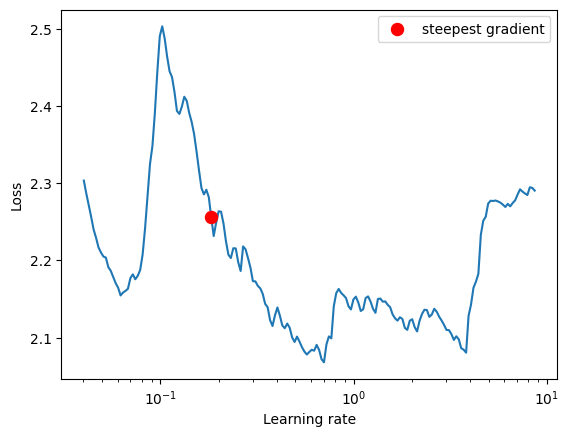

In [11]:
lrf.visualizeLR()

In [12]:
from torch.optim.lr_scheduler import OneCycleLR

model = ResNet18().to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

EPOCHS = 20

scheduler = OneCycleLR(
    optimizer,
    max_lr=1.83E-01,
    steps_per_epoch=len(train_loader),
    epochs=EPOCHS,
    pct_start=5 / EPOCHS,
    div_factor=100,
    three_phase=False,
    final_div_factor=100,
    anneal_strategy="linear",
)

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_losses = traintest.train(model, device, train_loader, optimizer, criterion)
    scheduler.step()
    test_acc,test_losses = traintest.test(model, device, test_loader, criterion)

EPOCH: 0


Train: Loss=1.4443 Batch_id=97 Accuracy=32.67: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]


Test set: Average loss: 0.0030, Accuracy: 4469/10000 (44.69%)

EPOCH: 1


Train: Loss=1.2534 Batch_id=97 Accuracy=48.31: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0026, Accuracy: 5243/10000 (52.43%)

EPOCH: 2


Train: Loss=1.1724 Batch_id=97 Accuracy=56.24: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]


Test set: Average loss: 0.0022, Accuracy: 6016/10000 (60.16%)

EPOCH: 3


Train: Loss=1.0368 Batch_id=97 Accuracy=62.11: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0025, Accuracy: 5701/10000 (57.01%)

EPOCH: 4


Train: Loss=0.8498 Batch_id=97 Accuracy=65.70: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0026, Accuracy: 5925/10000 (59.25%)

EPOCH: 5


Train: Loss=0.7787 Batch_id=97 Accuracy=70.10: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0021, Accuracy: 6552/10000 (65.52%)

EPOCH: 6


Train: Loss=0.7964 Batch_id=97 Accuracy=73.23: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]


Test set: Average loss: 0.0016, Accuracy: 7294/10000 (72.94%)

EPOCH: 7


Train: Loss=0.6788 Batch_id=97 Accuracy=76.30: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0016, Accuracy: 7383/10000 (73.83%)

EPOCH: 8


Train: Loss=0.6467 Batch_id=97 Accuracy=78.76: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0016, Accuracy: 7513/10000 (75.13%)

EPOCH: 9


Train: Loss=0.4464 Batch_id=97 Accuracy=81.13: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0013, Accuracy: 7871/10000 (78.71%)

EPOCH: 10


Train: Loss=0.5635 Batch_id=97 Accuracy=83.07: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]


Test set: Average loss: 0.0013, Accuracy: 7917/10000 (79.17%)

EPOCH: 11


Train: Loss=0.4242 Batch_id=97 Accuracy=84.59: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0012, Accuracy: 8126/10000 (81.26%)

EPOCH: 12


Train: Loss=0.4227 Batch_id=97 Accuracy=86.88: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0011, Accuracy: 8249/10000 (82.49%)

EPOCH: 13


Train: Loss=0.3119 Batch_id=97 Accuracy=87.63: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]


Test set: Average loss: 0.0012, Accuracy: 8137/10000 (81.37%)

EPOCH: 14


Train: Loss=0.2645 Batch_id=97 Accuracy=89.07: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0013, Accuracy: 8104/10000 (81.04%)

EPOCH: 15


Train: Loss=0.2776 Batch_id=97 Accuracy=90.43: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0012, Accuracy: 8319/10000 (83.19%)

EPOCH: 16


Train: Loss=0.2651 Batch_id=97 Accuracy=91.36: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0013, Accuracy: 8277/10000 (82.77%)

EPOCH: 17


Train: Loss=0.2147 Batch_id=97 Accuracy=92.20: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]


Test set: Average loss: 0.0012, Accuracy: 8265/10000 (82.65%)

EPOCH: 18


Train: Loss=0.1976 Batch_id=97 Accuracy=92.85: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Test set: Average loss: 0.0014, Accuracy: 8236/10000 (82.36%)

EPOCH: 19


Train: Loss=0.2112 Batch_id=97 Accuracy=93.34: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]


Test set: Average loss: 0.0012, Accuracy: 8300/10000 (83.00%)



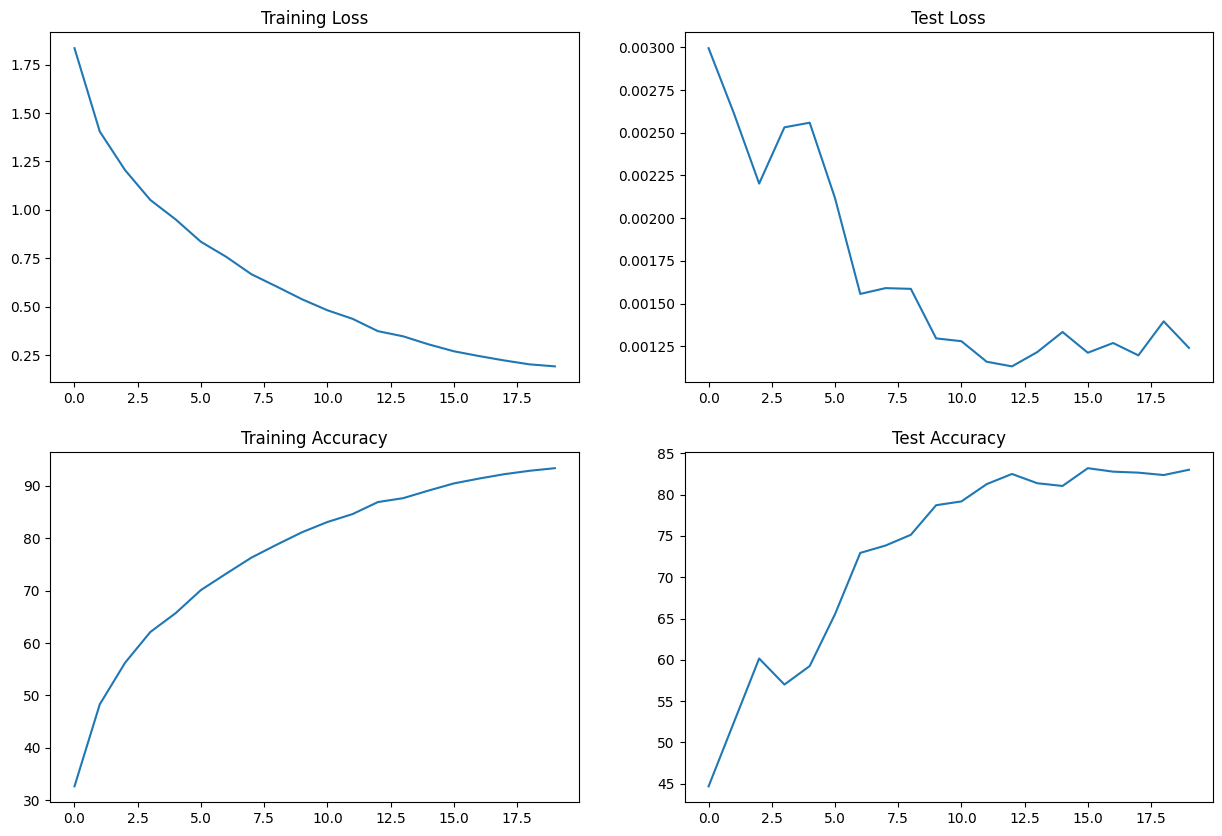

In [13]:
traintest.visualizeLoss(train_losses,train_acc,test_losses,test_acc)

In [17]:
import torch.backends.cudnn as cudnn
from utility.utils_S11 import getMisclassifiedImages, plot_misclassification, getGradCamImages

net = ResNet18()
net = net.to(device)
if device == "cuda":
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

misclassified = getMisclassifiedImages(net, device, test_loader)

tensor(16)


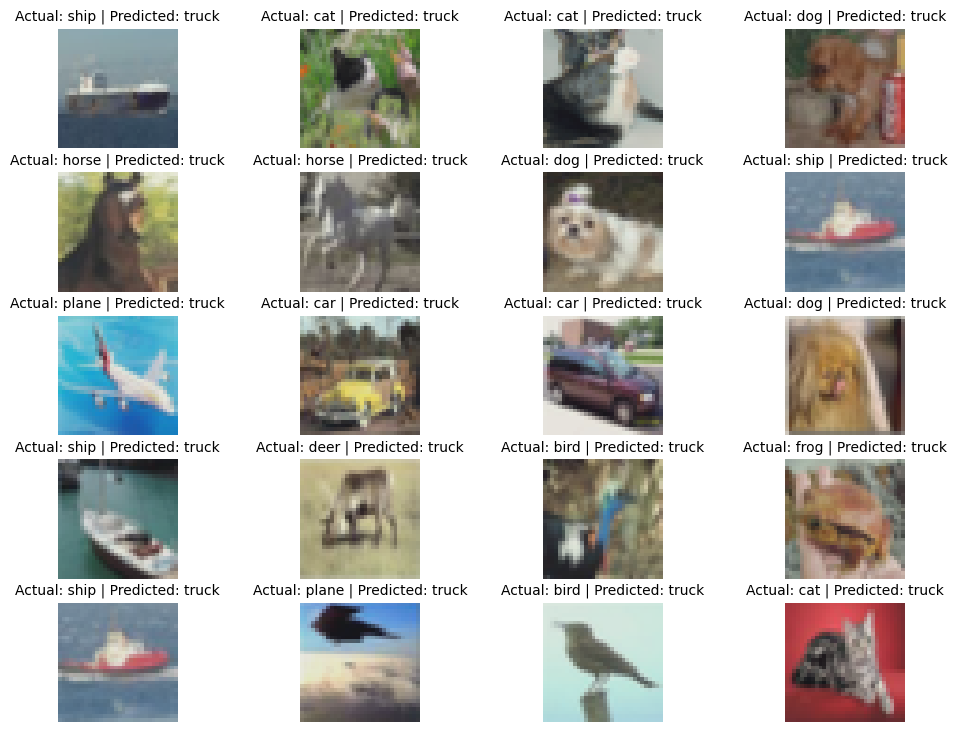

In [15]:
plot_sample = 20
shortlisted_misclf_images = plot_misclassification(misclassified, plot_sample_count=plot_sample)

In [18]:
getGradCamImages(net,shortlisted_misclf_images,plot_sample)

TypeError: getGradCamImages() takes 2 positional arguments but 3 were given